# 비지도학습 - PCA 차원 축소

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [3]:
# iris 데이터셋 로드
iris = load_iris()

In [4]:
# print(iris.DESCR)
# print(iris.keys())

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

### 데이터프레임 만들기

In [6]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_iris['target'] = iris.target

In [9]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# # 동일한 데이터를 test 로 split 할 때는 반드시 객체 생성한 후 데이터를 맞춰줘야 함
# # 객체 생성
# ss = StandardScaler()
# # scailng 알고리즘에 데이터를 맞춤
# ss.fit(df_iris.iloc[:, :4])

# # 데이터 변환
# data_scaled = ss.transform(df_iris.iloc[:, :4])

In [12]:
data_scaled = StandardScaler().fit_transform(df_iris.iloc[:, :4])

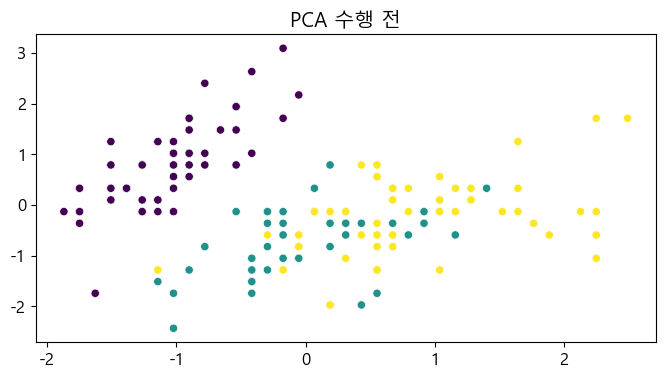

In [13]:
sns.scatterplot(x = data_scaled[:, 0], y=data_scaled[:, 1], c=df_iris.target) #hue = df_iris.tartget
plt.title('PCA 수행 전')
plt.show()

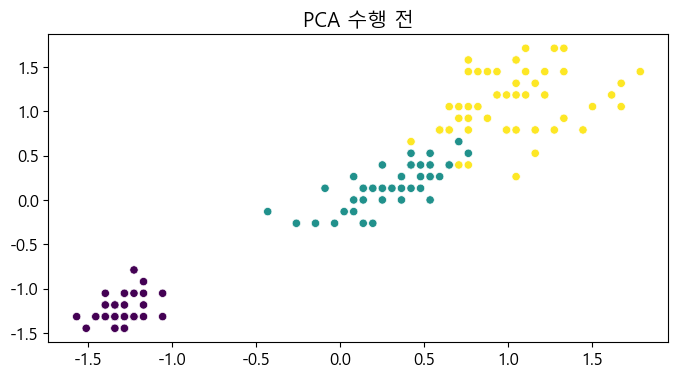

In [13]:
sns.scatterplot(x = data_scaled[:, 2], y=data_scaled[:, 3], c=df_iris.target) #hue = df_iris.tartget
plt.title('PCA 수행 전')
plt.show()

## PCA(차원축소, 주성분 분석)

- 선형 차원 축소 기법, 많이 활용되는 차원 축소 기법 중 하나
- 주요 특징 중의 하나는 분산(Variance)을 보존함
- 필수 파라미터 
  - components < 1 :  분산을 기준으로 차원 축소함
  - components > 1 : 지정한 값을 기준으로 feature을 축소 함
- PCA를 수행하기 전에 ScandardScaler() 실행함


In [14]:
# 라이브러리 임폴트
from sklearn.decomposition import PCA

pca 전달인자를 어떤 걸 주느냐에 따라 머신러닝 기능이 달라짐

In [15]:
# feature 2개로 차원 축소
# n_components : 축소할 차원 개수 지정 전달 인자 ( >1)
pca = PCA(n_components=2)

In [16]:
# StandardScaler로 데이터 normalization 적용
data_scaled = StandardScaler().fit_transform(df_iris.iloc[:, :4])
data_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [17]:
pca_data = pca.fit_transform(data_scaled)
pca_data[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

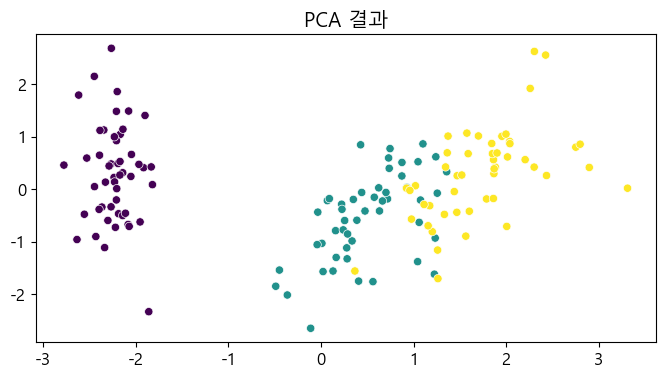

In [21]:
sns.scatterplot(x = pca_data[:, 0], y=pca_data[:, 1], c=iris.target) #hue = iris.tartget
plt.title('PCA 결과')
plt.show()

In [23]:
# PCA 객체생성, 분산을 유지하면서 차원축소
# 분산을 0.99 유지시킴
pca = PCA(n_components=0.99)
pca

PCA(n_components=0.99)

In [24]:
pca_data = pca.fit_transform(data_scaled)

In [27]:
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

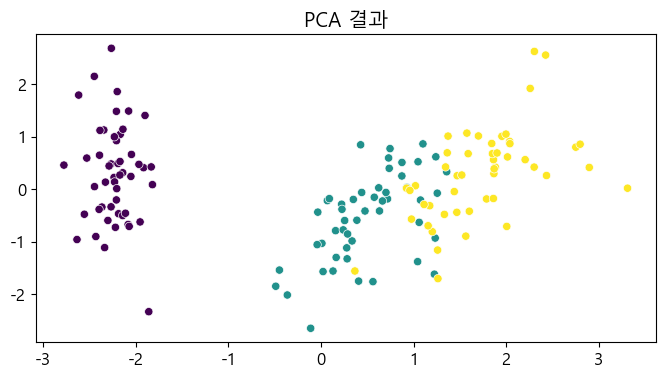

In [23]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], c=iris.target) #hue = iris.tartget
plt.title('PCA 결과')
plt.show()

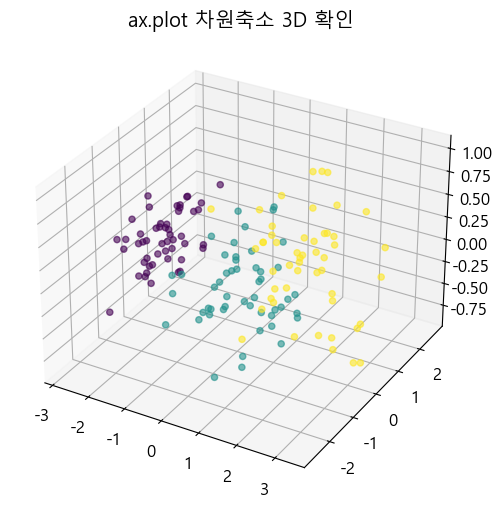

In [28]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df_iris['target'])
plt.savefig('./temp.svg')
plt.title('ax.plot 차원축소 3D 확인')
plt.show()

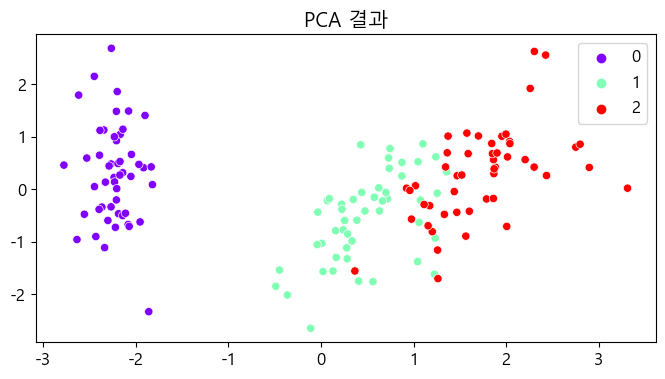

In [29]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=iris.target, palette="rainbow")
plt.title('PCA 결과')
plt.show()

### 차원축소-LDA
- LDA(Linear Discriminant Analysis) : 선형 판별 분석법(PCA와 유사함)
- 클래스(class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화하는 방식으로 차원을 축소함.

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [28]:
# StandardScaler로 데이터 normalization 적용
data_scaled = StandardScaler().fit_transform(df_iris.iloc[:, :4])
data_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [29]:
# 클래스 이름(y)를 같이 넣어야 함. 클라스간에 최대한 분리할수 있는 특징을 알 수 있도록 함
lda_data = lda.fit_transform(data_scaled, df_iris['target'])
lda_data[:3]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449]])

시각화로 확인하기

<Axes: >

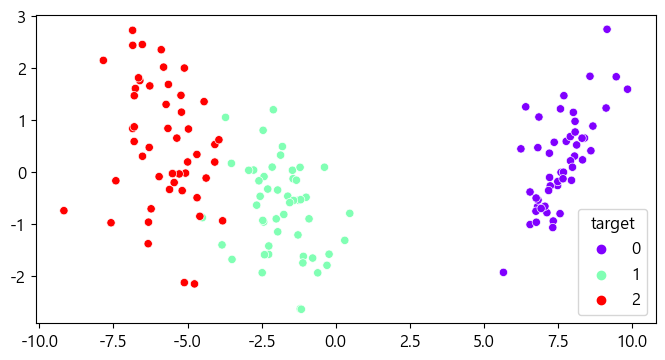

In [30]:
sns.scatterplot(x=lda_data[:, 0], 
                y=lda_data[:, 1], 
                hue=df_iris['target'], 
                palette='rainbow')

### 차원축소 - SVD
- SVD(Singular Value Decomposition)
- 상품의 추천 시스템에도 활용되어지는 알고리즘(추천시스템)
- 특이값 분해기법
- PCA와 유사한 차원 축소 기법
- scikit-learn 패키지에서는 truncated SVD(aka LSA) 사용

In [31]:
from sklearn.decomposition import TruncatedSVD

In [32]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [33]:
# StandardScaler로 데이터 normalization 적용
data_scaled = StandardScaler().fit_transform(df_iris.iloc[:, :4])
data_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [34]:
svd = TruncatedSVD(n_components=2)

In [35]:
svd_data = svd.fit_transform(data_scaled)

<Axes: >

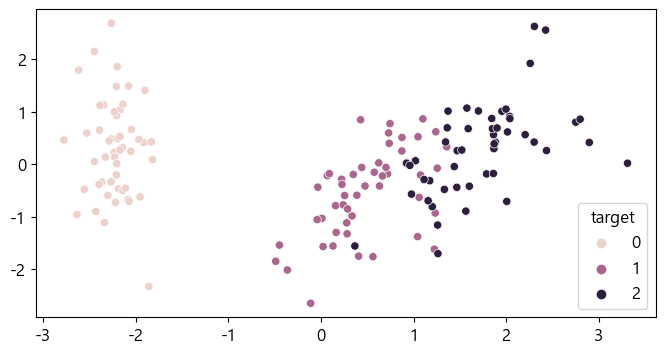

In [36]:
sns.scatterplot(x=svd_data[:,0], y=svd_data[:, 1], hue=df_iris['target'])

[정리] 차원 축소 방법
- PCA : 분산(Variance)을 보존하면서 차원을 축소하는 방식
- LDA : 선형 판별 분석법
- SVD : 추천시스템 알고리즘